### Explicación del SVM no lineal y el Kernel RBF

#### ¿Qué es un SVM no lineal?

Un **SVM no lineal** es una extensión del algoritmo **Support Vector Machine (SVM)** que se utiliza cuando los datos no pueden ser separados de manera lineal por un hiperplano. En este tipo de problemas, las clases no están claramente divididas por una línea recta (en 2D) o un hiperplano (en más dimensiones). Para resolver esto, el SVM usa una técnica conocida como **kernel trick** (truco del kernel) para proyectar los datos a un espacio de mayor dimensión donde puedan ser separados de manera lineal.

#### ¿Qué es el kernel RBF?

El **kernel RBF (Radial Basis Function)** es uno de los kernels más populares y utilizados en SVM no lineales. Se utiliza para **mapear los datos no lineales a un espacio de mayor dimensión** en el que se pueden separar de manera lineal.

- El kernel RBF se define de la siguiente manera:

   \( K(x, x') = \exp\left(-\gamma \cdot ||x - x'||^2\right) \)

  Donde:
  - **`x` y `x'`** son dos vectores de datos.
  - **`γ` (gamma)** es un parámetro que controla el radio de influencia de cada muestra de entrenamiento. Cuanto mayor sea el valor de gamma, más cerca estará cada muestra de afectar a su entorno inmediato. Un valor de gamma muy alto puede causar **overfitting**, mientras que un valor bajo puede llevar a **underfitting**.

#### ¿Cómo funciona el kernel RBF?

El kernel RBF mide la **distancia** entre dos puntos en el espacio original y los transforma a un espacio de mayor dimensión. El kernel RBF crea una nueva representación de los datos basada en la distancia entre los puntos y su influencia en su entorno.

- Si dos puntos están muy cerca, su valor de **`K(x, x')`** será cercano a 1 (alta similitud).
- Si los puntos están lejos, su valor será cercano a 0 (baja similitud).
  
De esta manera, el kernel RBF **crea una frontera de decisión no lineal** que puede separar los datos en clases que no son linealmente separables en el espacio original.

#### ¿Qué hace el SVM con las variables?

El SVM con el kernel RBF toma las variables originales de entrada (las características) y las proyecta en un espacio de características de mayor dimensión, sin necesidad de calcular explícitamente este espacio, gracias al kernel. Luego, en este espacio transformado, el SVM encuentra el **hiperplano óptimo** que separa las clases con el **máximo margen**.

### Parámetros importantes del kernel RBF:

1. **Gamma (`γ`):**
   - Controla cuánto afecta un solo punto de entrenamiento al hiperplano.
   - **Valores bajos de gamma:** Los puntos tienen una gran influencia, lo que significa que los puntos lejanos también pueden afectar el modelo. Esto tiende a generar un modelo más simple, con fronteras más suaves.
   - **Valores altos de gamma:** Los puntos tienen una influencia más limitada y local. Esto puede llevar a modelos muy complejos que se ajustan demasiado a los datos de entrenamiento, lo que puede causar **overfitting**.

2. **C (Parámetro de regularización):**
   - Controla el trade-off entre el ajuste perfecto a los datos de entrenamiento y la maximización del margen.
   - **Valores altos de `C`:** El modelo prioriza minimizar los errores en los datos de entrenamiento, a costa de tener un margen más estrecho.
   - **Valores bajos de `C`:** El modelo permite más errores en los datos de entrenamiento, pero prioriza un margen más amplio.

#### Resumen:

- **SVM no lineal con kernel RBF** permite separar clases en conjuntos de datos no lineales proyectando las variables originales a un espacio de mayor dimensión.
- **Kernel RBF** mide la similitud entre puntos y ajusta la frontera de decisión no lineal con base en esa similitud.
- **Gamma y C** son los hiperparámetros clave para controlar la complejidad y el ajuste del modelo.
  
El SVM con kernel RBF es útil en muchos problemas del mundo real donde los datos no son linealmente separables, como en problemas de clasificación compleja.


In [1]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


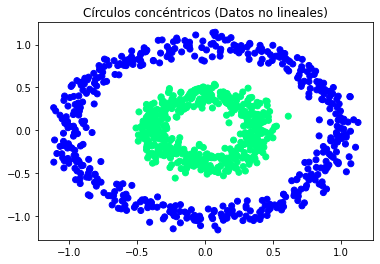

In [2]:

# Generar dataset con círculos concéntricos
# El parámetro factor controla el tamaño relativo de los dos círculos 
# y noise introduce un poco de ruido aleatorio en los datos.
X, y = make_circles(n_samples=1000, factor=0.4, noise=0.07)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Visualizar los datos para ver la distribución no lineal
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.title("Círculos concéntricos (Datos no lineales)")
plt.show()


Matriz de confusión (Kernel Lineal):


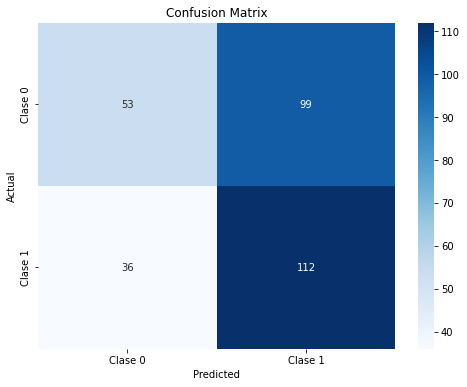


Informe de clasificación (Kernel Lineal):
              precision    recall  f1-score   support

           0       0.60      0.35      0.44       152
           1       0.53      0.76      0.62       148

    accuracy                           0.55       300
   macro avg       0.56      0.55      0.53       300
weighted avg       0.56      0.55      0.53       300



In [3]:
# Crear y entrenar un modelo SVM con kernel lineal
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Predicciones y evaluación con kernel lineal
y_pred_linear = linear_svm.predict(X_test)
print("Matriz de confusión (Kernel Lineal):")

# Genero la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_linear)

# Visualizar la matriz de confusión
plt.figure(figsize=(8,6))  # Ajustar el tamaño del gráfico a 8x6 pulgadas
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Clase 0', 'Clase 1'], 
            yticklabels=['Clase 0', 'Clase 1'])  # Cambiar etiquetas según las clases
plt.xlabel('Predicted')  # Etiqueta del eje X: Predicciones
plt.ylabel('Actual')  # Etiqueta del eje Y: Valores Reales
plt.title('Confusion Matrix')  # Título de la gráfica
plt.show()  # Mostrar el gráfico

print("\nInforme de clasificación (Kernel Lineal):")
print(classification_report(y_test, y_pred_linear))


Matriz de confusión (Kernel RBF):


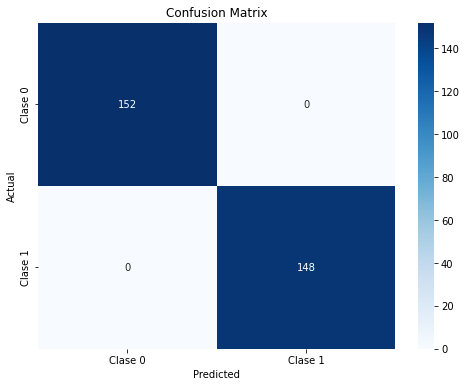


Informe de clasificación (Kernel RBF):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       148

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [4]:
# Crear y entrenar un modelo SVM con kernel RBF (no lineal)
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)

# Predicciones y evaluación con kernel RBF
y_pred_rbf = rbf_svm.predict(X_test)

# Genero la matriz de confusión
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
print("Matriz de confusión (Kernel RBF):")


# Visualizar la matriz de confusión
plt.figure(figsize=(8,6))  # Ajustar el tamaño del gráfico a 8x6 pulgadas
sns.heatmap(conf_matrix_rbf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Clase 0', 'Clase 1'], 
            yticklabels=['Clase 0', 'Clase 1'])  # Cambiar etiquetas según las clases
plt.xlabel('Predicted')  # Etiqueta del eje X: Predicciones
plt.ylabel('Actual')  # Etiqueta del eje Y: Valores Reales
plt.title('Confusion Matrix')  # Título de la gráfica
plt.show()  # Mostrar el gráfico

print("\nInforme de clasificación (Kernel RBF):")
print(classification_report(y_test, y_pred_rbf))


### Descripción de las métricas:

1. **Precision (Precisión):**
   - **Definición:** Es el número de verdaderos positivos dividido por el número total de positivos predichos (verdaderos positivos + falsos positivos).
   - **Fórmula:** `precision = TP / (TP + FP)`
   - **Interpretación:** De todas las veces que el modelo predijo una clase como positiva, ¿cuántas veces fue correcta? Una precisión de 1.00 (100%) indica que cada vez que el modelo predijo una clase específica, siempre estuvo en lo correcto.

2. **Recall (Exhaustividad o Sensibilidad):**
   - **Definición:** Es el número de verdaderos positivos dividido por el número total de elementos que realmente son positivos (verdaderos positivos + falsos negativos).
   - **Fórmula:** `recall = TP / (TP + FN)`
   - **Interpretación:** De todos los casos que realmente son positivos, ¿cuántas veces los predijo correctamente el modelo? Un recall de 1.00 significa que el modelo capturó todos los casos positivos sin errores.

3. **F1-Score:**
   - **Definición:** Es la media armónica de la precisión y el recall. Proporciona una única métrica que equilibra precisión y recall.
   - **Fórmula:** `F1 = 2 * (precision * recall) / (precision + recall)`
   - **Interpretación:** El **f1-score** es útil cuando queremos un equilibrio entre precisión y recall, especialmente cuando las clases están desbalanceadas. Un f1-score de 1.00 indica que el balance entre precisión y recall es perfecto.

4. **Support (Soporte):**
   - **Definición:** Es el número total de ocurrencias de cada clase en el conjunto de datos de prueba.
   - **Interpretación:** Muestra cuántos ejemplos reales pertenecen a cada clase en el conjunto de prueba. En este caso, hay 152 muestras de la clase `0` y 148 muestras de la clase `1`.

### Métricas globales:

1. **Accuracy (Precisión global):**
   - **Definición:** Es el número total de predicciones correctas dividido por el número total de muestras.
   - **Fórmula:** `accuracy = (TP + TN) / (TP + TN + FP + FN)`
   - **Interpretación:** En este caso, la **accuracy** es 1.00 (100%), lo que significa que el modelo clasificó correctamente todas las muestras de las clases `0` y `1`.

2. **Macro avg (Promedio macro):**
   - **Definición:** Es el promedio simple de las métricas de precisión, recall y f1-score entre todas las clases. No toma en cuenta el desequilibrio en las clases, simplemente promedia las métricas por igual para cada clase.
   - **Interpretación:** Dado que ambas clases tienen las mismas métricas (1.00), el promedio macro también es 1.00.

3. **Weighted avg (Promedio ponderado):**
   - **Definición:** Es el promedio ponderado de las métricas de precisión, recall y f1-score, teniendo en cuenta el número de muestras en cada clase (el **support**).
   - **Interpretación:** Dado que las clases están bastante balanceadas y ambas tienen métricas perfectas, el promedio ponderado también es 1.00.
